## This notebook contains SIFT ana LBP feature extraction which are used to extract features from the facial images and then passed to a CNN model to compare their results


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shoroogalarifi","key":"0c08fe591841078dbd94f2fd150ddb04"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/ 

In [91]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          26330        731  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1439         39  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4049         86  1.0              
mohithsairamreddy/salary-data 

In [ ]:
!kaggle datasets download -d shawon10/ckplus

 83% 3.00M/3.63M [00:01<00:00, 3.44MB/s]
100% 3.63M/3.63M [00:01<00:00, 3.15MB/s]


In [ ]:
! unzip ckplus.zip -d train

Archive:  ckplus.zip
  inflating: train/CK+48/anger/S010_004_00000017.png  
  inflating: train/CK+48/anger/S010_004_00000018.png  
  inflating: train/CK+48/anger/S010_004_00000019.png  
  inflating: train/CK+48/anger/S011_004_00000019.png  
  inflating: train/CK+48/anger/S011_004_00000020.png  
  inflating: train/CK+48/anger/S011_004_00000021.png  
  inflating: train/CK+48/anger/S014_003_00000028.png  
  inflating: train/CK+48/anger/S014_003_00000029.png  
  inflating: train/CK+48/anger/S014_003_00000030.png  
  inflating: train/CK+48/anger/S022_005_00000030.png  
  inflating: train/CK+48/anger/S022_005_00000031.png  
  inflating: train/CK+48/anger/S022_005_00000032.png  
  inflating: train/CK+48/anger/S026_003_00000013.png  
  inflating: train/CK+48/anger/S026_003_00000014.png  
  inflating: train/CK+48/anger/S026_003_00000015.png  
  inflating: train/CK+48/anger/S028_001_00000022.png  
  inflating: train/CK+48/anger/S028_001_00000023.png  
  inflating: train/CK+48/anger/S028_001_0000

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

In [ ]:
np.random.seed(42)

# loading data

In [ ]:
os.listdir('/content/train')

['CK+48', 'ck']

In [ ]:
DATADIR = r'/content/train/CK+48'

In [ ]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES

['sadness', 'contempt', 'happy', 'fear', 'disgust', 'surprise', 'anger']

In [ ]:
data_path ="/content/train/CK+48/"

for dir1 in os.listdir(data_path):
    count=0
    for f in os.listdir(data_path + dir1):
        count+=1
    print(f"{dir1} has {count} images")

sadness has 84 images
contempt has 54 images
happy has 207 images
fear has 75 images
disgust has 177 images
surprise has 249 images
anger has 135 images


In [ ]:
def load_data():
    DATADIR = r'/content/train/CK+48'
    data = []
    # loading training data
    for category in CATEGORIES:
        # create path to image of respective expression
        path = os.path.join(DATADIR, category)
        # get the classification  for each expression 
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])
            
    return data

In [ ]:
data = load_data()

100%|██████████| 135/135 [00:00<00:00, 10943.78it/s]


In [ ]:
len(data) #total images in CK+48

981

#Visualization of some images 

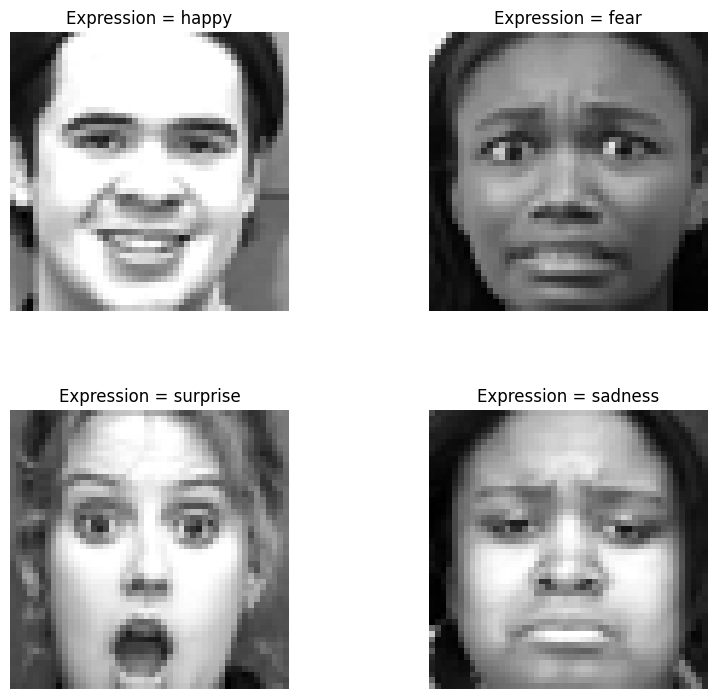

In [ ]:
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (9,9))
axes = axes.ravel()

for i in range(0, L * W):  
    sample = random.choice(data)
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(sample[0], cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Creating training and testing data (80,20)

In [ ]:
X = np.array([ x[0] for x in data])
y = np.array([Y[1] for Y in data])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("-------------------------------")
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (784, 48, 48)
y_train shape:  (784,)
-------------------------------
X_test shape:  (197, 48, 48)
y_test shape:  (197,)


In [ ]:
# reshaping y_train and y_test
y_train = np.reshape(y_train, (len(y_train),1))
y_test  = np.reshape(y_test , (len(y_test ),1))

print("After reshaping")
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

After reshaping
y_train shape:  (784, 1)
y_test shape:  (197, 1)


## Adding color channel 

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print("After adding color channel")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

After adding color channel
X_train shape:  (784, 48, 48, 1)
X_test shape:  (197, 48, 48, 1)


In [ ]:
datagen = ImageDataGenerator(

        shear_range=0.2, 
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        fill_mode="nearest")

datagen.fit(X_train)

## Normalizing pixel values 

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Converting single values to category array 

In [ ]:
y_train[0]

array([6])

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train.shape, y_test.shape

((784, 7), (197, 7))

In [ ]:
def create_model(input_shape=None):
    if input_shape is None :
        input_shape=(48,48,1)
     
    model = Sequential()
    #first conv layer
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    #second conv layer
    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    #third conv layer
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    #fourth conv layer
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    #fc layer
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))
    
    return model

In [ ]:
#Using callback to help building better model and to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           mode='min',
                           min_delta=0.001,
                           restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

callbacks = [early_stop,learning_rate_reduction]

In [ ]:
def plot_performance(history):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    plt.legend()
    plt.grid()
    plt.title('train and val loss evolution')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')

    plt.legend()
    plt.grid()
    plt.title('train and val accuracy')

# LBP Feature Extraction


In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
        for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values 
            img1_vector = np.delete(img1_vector,4)  
            digit = np.where(img1_vector)[0]         
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n<center assign 0
            else:                                    # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

### How LBP looks ?

(-0.5, 47.5, 47.5, -0.5)

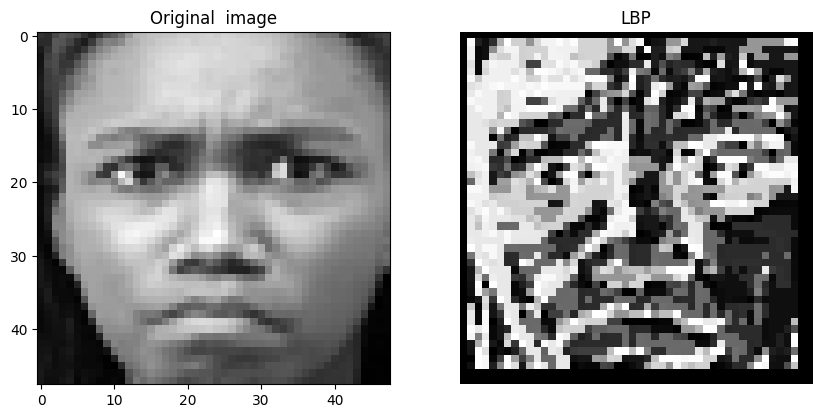

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
img = random.choice(X_train)       #choose randomly from x_train
plt.title("Original  image")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("LBP")
imgLBP=Binarypattern(img)             # calling the LBP function using gray image
plt.imshow(imgLBP, cmap='gray')
plt.axis('off')

### Creating Feature Vectors for training and testing 

In [ ]:
X_train.shape

(784, 48, 48, 1)

### LBP extracted features

In [ ]:
def create_LBP_features(data):
    Feature_data = np.zeros(data.shape)

    for i in range(len(data)):
        img = data[i]
        imgLBP=Binarypattern(img)  
        Feature_data[i] = imgLBP
    
    return Feature_data

In [ ]:
Feature_X_train = create_LBP_features(X_train)

In [ ]:
Feature_X_train.shape

(784, 48, 48, 1)

### LBP in training set

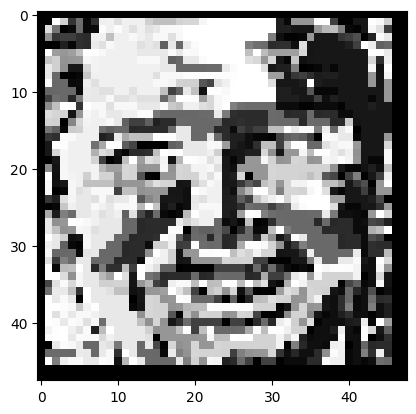

In [ ]:
img = random.choice(Feature_X_train)
plt.imshow(img, cmap='gray')

### LBP in testing set

In [ ]:
Feature_X_test = create_LBP_features(X_test)
Feature_X_test.shape

(197, 48, 48, 1)

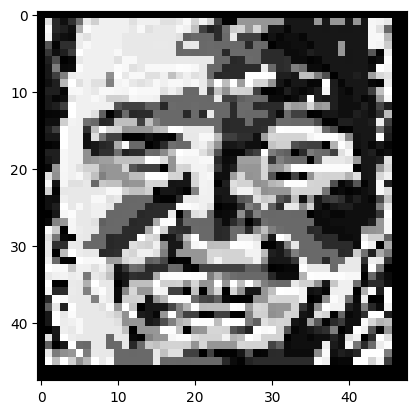

In [ ]:
img = random.choice(Feature_X_test)
plt.imshow(img, cmap='gray')

### CNN classification based on LBP features

In [ ]:
LBP_model = create_model()
LBP_model.summary()
LBP_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         156       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                        

In [ ]:
LBP_history = LBP_model.fit(Feature_X_train, y_train, batch_size=8 , epochs=50, validation_data = (Feature_X_test, y_test) ,callbacks = [callbacks])

Epoch 1/50
98/98 [==============================] - 14s 10ms/step - loss: 1.9624 - accuracy: 0.3189 - val_loss: 2.1922 - val_accuracy: 0.2690 - lr: 0.0010
Epoch 2/50
98/98 [==============================] - 1s 7ms/step - loss: 1.3054 - accuracy: 0.5217 - val_loss: 1.3096 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 3/50
98/98 [==============================] - 1s 7ms/step - loss: 0.9626 - accuracy: 0.6531 - val_loss: 0.8114 - val_accuracy: 0.7107 - lr: 0.0010
Epoch 4/50
98/98 [==============================] - 1s 10ms/step - loss: 0.7312 - accuracy: 0.7321 - val_loss: 0.6724 - val_accuracy: 0.7766 - lr: 0.0010
Epoch 5/50
98/98 [==============================] - 1s 10ms/step - loss: 0.5855 - accuracy: 0.7959 - val_loss: 0.6005 - val_accuracy: 0.7716 - lr: 0.0010
Epoch 6/50
98/98 [==============================] - 1s 9ms/step - loss: 0.4138 - accuracy: 0.8661 - val_loss: 0.4185 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 7/50
98/98 [==============================] - 1s 7ms/step - loss: 0.3119

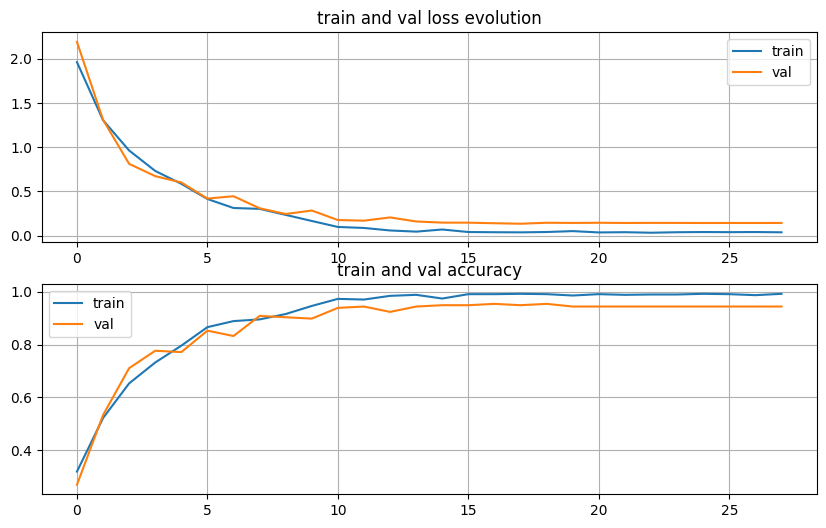

In [ ]:
plot_performance(LBP_history)

In [ ]:
acc = []

In [ ]:
LBP_acc = LBP_model.evaluate(Feature_X_test, y_test, verbose = 0)[1]
acc.append(LBP_acc)
print("LBP Accuracy :",LBP_model.evaluate(Feature_X_test, y_test, verbose = 0)[1])

LBP Accuracy : 0.9492385983467102


In [ ]:
LBP_model.save('LBP_model.h5')

# SIFT Feature Extraction

### How SIFT looks ?

(-0.5, 47.5, 47.5, -0.5)

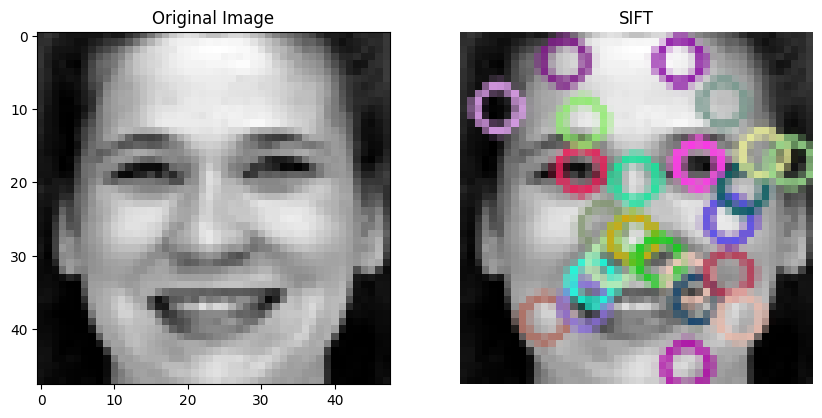

In [ ]:
sample = random.choice(data)
image8bit = cv2.normalize(sample[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(image8bit, None)
img_kp = cv2.drawKeypoints(image8bit, kp, sample[0])

#plotting
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(sample[0], cmap='gray')
    
plt.subplot(1,2,2)
plt.title("SIFT")
plt.imshow(img_kp, cmap='gray')
plt.axis('off')

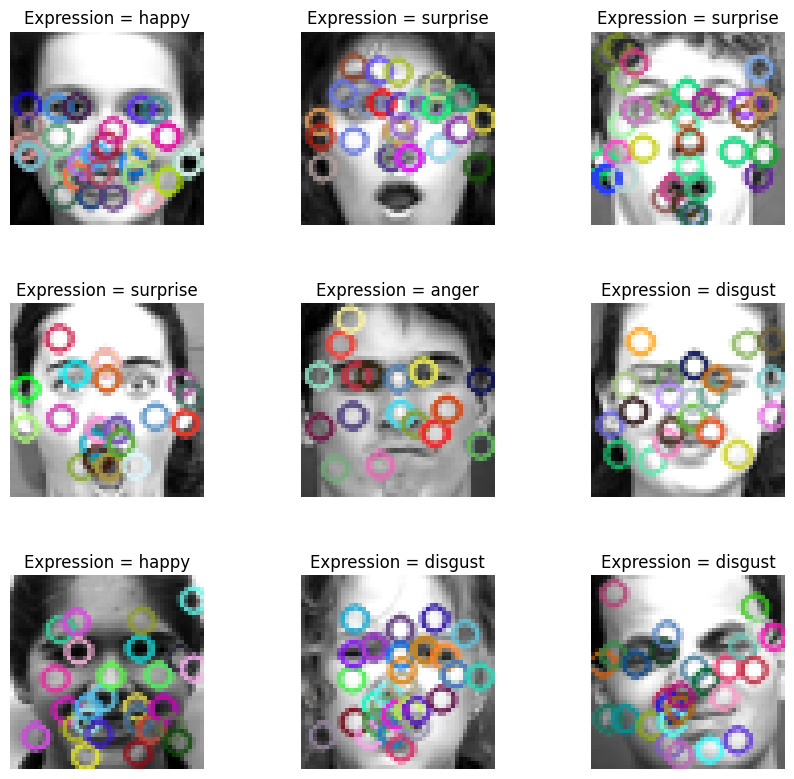

In [ ]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel()

for i in range(0, L * W):  
    sample = random.choice(data)
    image8bit = cv2.normalize(sample[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(image8bit,None)

    img = cv2.drawKeypoints(image=image8bit, outImage=sample[0], keypoints = kp)
    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)


In [ ]:
img.shape

(48, 48, 3)

so to create a feature vector we will have to create an empty array of shape (len(data), 48,48,3) 

### Creating Feature Vectors for training and testing 

In [ ]:
def create_SIFT_features(data):

    Feature_data = np.zeros((len(data),48,48,3))

    for i in range(len(data)):
        img = data[i]
        image8bit = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(image8bit,None)

        img = cv2.drawKeypoints(image=image8bit, outImage=img, keypoints = kp)
        Feature_data[i] = img/255.0

        
    return Feature_data 
    

### SIFT in training set

In [ ]:
X_train_SIFT = create_SIFT_features(X_train) 
X_train_SIFT.shape

(784, 48, 48, 3)

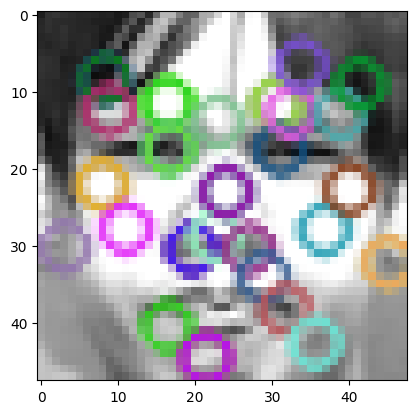

In [ ]:
plt.imshow(X_train_SIFT[0], cmap='gray')

### SIFT in testing set

In [ ]:
X_test_SIFT = create_SIFT_features(X_test) 
X_test_SIFT.shape

(197, 48, 48, 3)

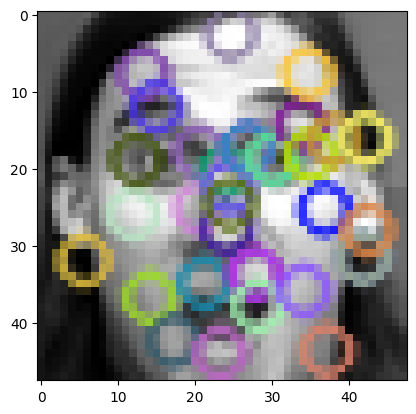

In [ ]:
plt.imshow(X_test_SIFT[0], cmap='gray')

### CNN classification based on SIFT features

In [ ]:
SIFT_model = create_model(input_shape=(48,48,3))
SIFT_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [ ]:
SIFT_history = SIFT_model.fit(X_train_SIFT, y_train, batch_size=8 , epochs=50, validation_data = (X_test_SIFT, y_test),  callbacks = [callbacks])

Epoch 1/50
98/98 [==============================] - 5s 10ms/step - loss: 2.0599 - accuracy: 0.2819 - val_loss: 2.0326 - val_accuracy: 0.1320 - lr: 0.0010
Epoch 2/50
98/98 [==============================] - 1s 7ms/step - loss: 1.5807 - accuracy: 0.4349 - val_loss: 1.7242 - val_accuracy: 0.3858 - lr: 0.0010
Epoch 3/50
98/98 [==============================] - 1s 7ms/step - loss: 1.2783 - accuracy: 0.5651 - val_loss: 1.2124 - val_accuracy: 0.5838 - lr: 0.0010
Epoch 4/50
98/98 [==============================] - 1s 8ms/step - loss: 1.0993 - accuracy: 0.6212 - val_loss: 1.1976 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 5/50
98/98 [==============================] - 1s 7ms/step - loss: 0.9648 - accuracy: 0.6518 - val_loss: 0.9559 - val_accuracy: 0.6497 - lr: 0.0010
Epoch 6/50
98/98 [==============================] - 1s 7ms/step - loss: 0.8516 - accuracy: 0.6913 - val_loss: 1.0753 - val_accuracy: 0.6294 - lr: 0.0010
Epoch 7/50
98/98 [==============================] - 1s 8ms/step - loss: 0.7852 - 

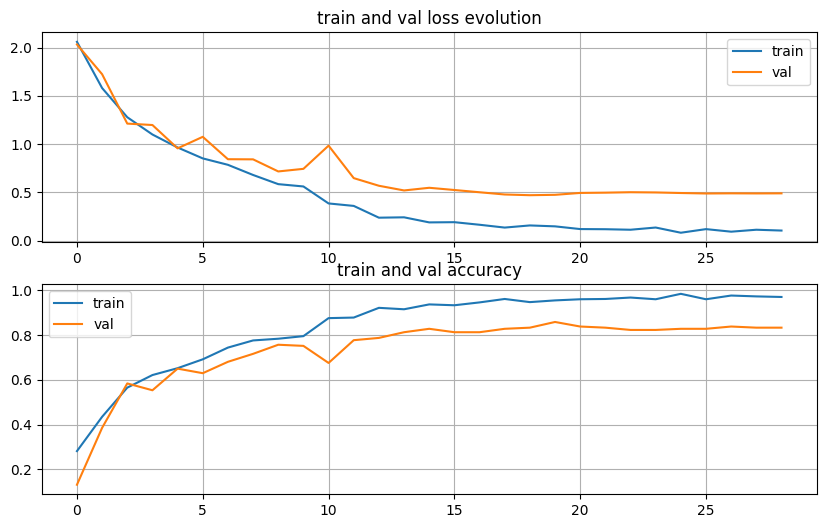

In [ ]:
plot_performance(SIFT_history)

In [ ]:
SIFT_acc = SIFT_model.evaluate(X_test_SIFT, y_test, verbose = 0)[1]
acc.append(SIFT_acc)
print("SIFT Accuracy :",SIFT_model.evaluate(X_test_SIFT, y_test, verbose = 0)[1])

SIFT Accuracy : 0.8324872851371765


In [ ]:
SIFT_model.save('SIFT_model.h5')

# Without Feature Extraction 

In [ ]:
WFE_model = create_model()
WFE_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [ ]:
WFE_history = WFE_model.fit(X_train, y_train, batch_size=8 , epochs=50, validation_data = (X_test, y_test) ,callbacks = [callbacks])

Epoch 1/50
98/98 [==============================] - 4s 9ms/step - loss: 1.8747 - accuracy: 0.3686 - val_loss: 2.7939 - val_accuracy: 0.0406 - lr: 0.0010
Epoch 2/50
98/98 [==============================] - 1s 7ms/step - loss: 1.0451 - accuracy: 0.6607 - val_loss: 3.6661 - val_accuracy: 0.0406 - lr: 0.0010
Epoch 3/50
95/98 [============================>.] - ETA: 0s - loss: 0.6851 - accuracy: 0.7592
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
98/98 [==============================] - 1s 6ms/step - loss: 0.6791 - accuracy: 0.7615 - val_loss: 3.6009 - val_accuracy: 0.0406 - lr: 0.0010
Epoch 4/50
98/98 [==============================] - 1s 7ms/step - loss: 0.4144 - accuracy: 0.8584 - val_loss: 2.1916 - val_accuracy: 0.1523 - lr: 3.0000e-04
Epoch 5/50
98/98 [==============================] - 1s 10ms/step - loss: 0.3629 - accuracy: 0.8724 - val_loss: 0.9944 - val_accuracy: 0.6091 - lr: 3.0000e-04
Epoch 6/50
98/98 [==============================] - 1s 10ms/step - 

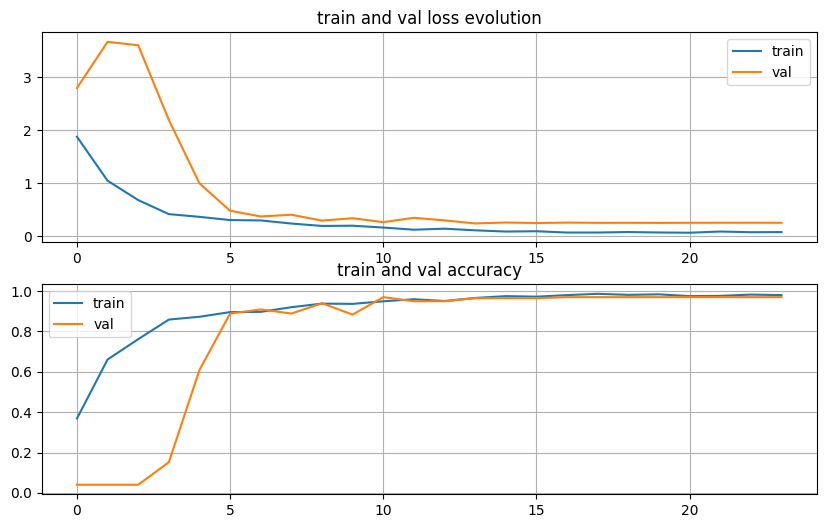

In [ ]:
plot_performance(WFE_history)

In [ ]:
WFE_acc = WFE_model.evaluate(X_test, y_test, verbose = 0)[1]
acc.append(WFE_acc)
print("Without Feature extraction Accuracy :", WFE_acc)

Without Feature extraction Accuracy : 0.9644669890403748


In [ ]:
WFE_model.save('WFE_model.h5')

# Comparing accuracies 

In [ ]:
acc

[0.9492385983467102, 0.8324872851371765, 0.9644669890403748]

In [ ]:
results = pd.DataFrame(acc, index=['LBP', 'SIFT',  'Without Feature Extraction'], columns = ['Accuracies'])

In [ ]:
dfStyler = results.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Accuracies
LBP,0.949239
SIFT,0.832487
Without Feature Extraction,0.964467


### So it can be seen that feature extraction with LBP filters are giving pretty good results than the SIFT method but also it can noted that CNNs witout any feature extraction methods are also giving good results than the other two feature extraction techniques.